# Support Vector Machines
Support vector machine is a supervised learning algorithm that can be used for both `classification` and `regression` tasks. It is a type of linear model that finds a `hyperplane` that maximally separates the classes in the feature space.\
Types of SVM kernels:
- Linear Kernel
- Polynomial Kernel
- Radial Basis Function (RBF) Kernel

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
# load data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# lets make X and y in data
X = df.drop('species', axis=1)
y = df['species']

In [5]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# call the model
model = SVC(kernel='rbf')

In [7]:
# train the model
model.fit(X_train, y_train)

SVC()

In [8]:
# evaluate the model
predictions = model.predict(X_test)
predictions

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [9]:
# metrics
print(confusion_matrix(y_test, predictions))
print('------------------------------------------------------')
print(classification_report(y_test, predictions))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
------------------------------------------------------
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
# predict on new input
new_input = [[5.1, 3.5, 1.4, 0.2]]
model.predict(new_input)

c:\ProgramData\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

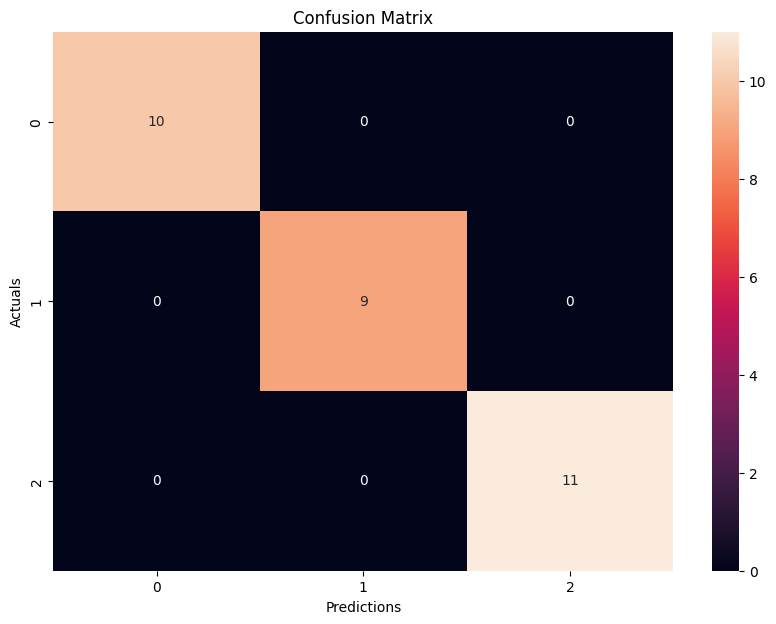

In [11]:
# draw confusion matrix heatmap in plotly
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)
# labels
plt.xlabel('Predictions')
plt.ylabel('Actuals')
# title
plt.title('Confusion Matrix')
# show the plot
plt.show()

In [12]:
# save the model
import pickle
pickle.dump(model, open('./saved_models/svc_model.pkl', 'wb'))